In [69]:
%matplotlib inline
from matplotlib.pyplot import figure, plot, style
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
style.use("ggplot")

In [89]:
from numpy import matrix, sin, cos, pi, array, sum, abs, linspace, meshgrid, sqrt
τ = 2*pi

In [62]:
from itertools import product, combinations

In [38]:
def ejes(axis, origen, orientacion, long=0.5):
    '''
    Esta función grafica un sistema de ejes coordenados, tomando en cuenta a axis como el
    area principal de la figura sobre la que se quiere dibujar, origen como el vector de
    posición sobre el que se dibujará el sistema de ejes coordenados y orientación, la
    matriz de rotación que define la orientación del sistema de ejes coordenados y la
    longitud requerida para cada vector.
    
    Para graficar un sistema de ejes coordenados en el origen, con orientación normal, se
    puede hacer lo siguiente
    
    fig = figure()
    ax = fig.gca()
    
    ejes(ax, matrix([0, 0, 0]), eye(3), 0.5)
    '''
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='k')

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='k')

    us, vs, ws = zip(k)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='k')

In [39]:
l = 1
θ = τ/12

A1 = matrix([[cos(θ), -sin(θ), 0, l*cos(θ)],
             [sin(θ), cos(θ), 0, l*sin(θ)],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

o1 = A1[:3, 3:]
R1 = A1[:3, :3]

In [40]:
from numpy import eye, matrix
o0 = matrix([[0],[0],[0]])
R0 = eye(3)
xs = [o0.item(0), o1.item(0)]
ys = [o0.item(1), o1.item(1)]
zs = [o0.item(2), o1.item(2)]

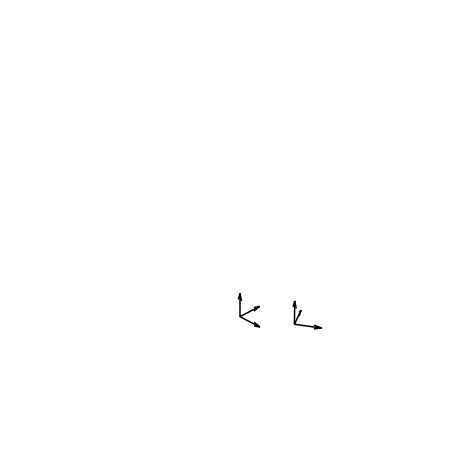

In [42]:
f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')
a1.set_facecolor((1.0, 1.0, 1.0, 1.0))
a1._axis3don = False
a1.view_init(elev=30., azim=-45.)

ejes(a1, o0, R0, 0.5)
ejes(a1, o1, R1, 0.5)

#p1, = a1.plot(xs, ys, zs, '-o', lw=10, solid_capstyle='round')

a1.set_xlim(-2.1, 2.1)
a1.set_ylim(-2.1, 2.1)
a1.set_zlim(-0.1, 4.1);

In [43]:
def cuboid_data(center, size=(1,1,1)):
    o = [a - b / 2 for a, b in zip(center, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in bottom surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in upper surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in outside surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  # x coordinate of points in inside surface
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in bottom surface
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in upper surface
         [o[1], o[1], o[1], o[1], o[1]],          # y coordinate of points in outside surface
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]    # y coordinate of points in inside surface
    z = [[o[2], o[2], o[2], o[2], o[2]],                        # z coordinate of points in bottom surface
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],    # z coordinate of points in upper surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],                # z coordinate of points in outside surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]                # z coordinate of points in inside surface
    return x, y, z

def plotCubeAt(pos=(0,0), N=0, ax=None):
    # Plotting N cube elements at position pos
    if ax !=None:
        if N > 0:
            for n in range(N):
                X, Y, Z = cuboid_data( (pos[0],pos[1],n) )
                ax.plot_surface(X, Y, Z, color='b', rstride=1, cstride=1, alpha=1)

def plotIsoMatrix(ax, matrix):
    # plot a Matrix 
    # where matrix[i,j] cubes are added at position (i,j) 
    for i  in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                plotCubeAt(pos=(i,j), N=matrix[i,j], ax=ax)

    l = max(matrix.shape[0], matrix.shape[1], matrix.max())
    bb = np.array([(0,0,0), (0,l,0), (l,0,0), (l,l,0),(0,0,l), (0,l,l), (l,0,l), (l,l,l)])
    ax.plot(bb[:,0], bb[:,1], bb[:,2], "w", alpha=0.0)     

In [47]:
matrix = array([[3,2],[1,1]])

In [60]:
cuboid_data((0,0,0))

([[-0.5, 0.5, 0.5, -0.5, -0.5],
  [-0.5, 0.5, 0.5, -0.5, -0.5],
  [-0.5, 0.5, 0.5, -0.5, -0.5],
  [-0.5, 0.5, 0.5, -0.5, -0.5]],
 [[-0.5, -0.5, 0.5, 0.5, -0.5],
  [-0.5, -0.5, 0.5, 0.5, -0.5],
  [-0.5, -0.5, -0.5, -0.5, -0.5],
  [0.5, 0.5, 0.5, 0.5, 0.5]],
 [[-0.5, -0.5, -0.5, -0.5, -0.5],
  [0.5, 0.5, 0.5, 0.5, 0.5],
  [-0.5, -0.5, 0.5, 0.5, -0.5],
  [-0.5, -0.5, 0.5, 0.5, -0.5]])

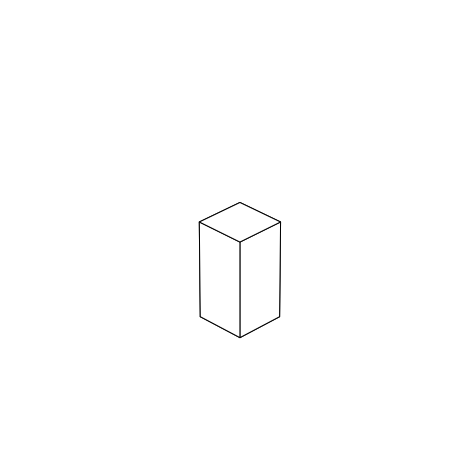

In [88]:
f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')
a1.set_facecolor((1.0, 1.0, 1.0, 1.0))
a1._axis3don = False
a1.view_init(elev=30., azim=-45.)

#ejes(a1, o0, R0, 0.5)
#ejes(a1, o1, R1, 0.5)
#plotIsoMatrix(a1, matrix)
#plotCubeAt((0, 0, 0),  1, a1)

# draw cube
#r = [-1, 1]
#for s, e in combinations(array(list(product(r, r, r))), 2):
#    if sum(abs(s-e)) == r[1]-r[0]:
#        a1.plot3D(*zip(s, e), color="k")

#p1, = a1.plot(xs, ys, zs, '-o', lw=10, solid_capstyle='round')

centro_inf = [0,0,0]
largo = 2
centro_sup = [centro_inf[0],centro_inf[1],largo]
ancho_x = 1
ancho_y = 1

v = array([[centro_inf[0]-ancho_x/2,centro_inf[1]-ancho_y/2,centro_inf[2]],
           [centro_inf[0]-ancho_x/2,centro_inf[1]+ancho_y/2,centro_inf[2]],
           [centro_inf[0]+ancho_x/2,centro_inf[1]-ancho_y/2,centro_inf[2]],
           [centro_inf[0]+ancho_x/2,centro_inf[1]+ancho_y/2,centro_inf[2]],
           [centro_inf[0]-ancho_x/2,centro_inf[1]-ancho_y/2,centro_sup[2]],
           [centro_inf[0]-ancho_x/2,centro_inf[1]+ancho_y/2,centro_sup[2]],
           [centro_inf[0]+ancho_x/2,centro_inf[1]-ancho_y/2,centro_sup[2]],
           [centro_inf[0]+ancho_x/2,centro_inf[1]+ancho_y/2,centro_sup[2]]])

# generate list of sides' polygons of our pyramid
verts = [[v[0],v[1],v[3],v[2]],
         [v[4],v[5],v[7],v[6]],
         [v[0],v[1],v[5],v[4]],
         [v[1],v[3],v[7],v[5]],
         [v[2],v[3],v[7],v[6]],
         [v[0],v[2],v[6],v[4]]]

# plot sides
a1.add_collection3d(Poly3DCollection(verts, facecolors='white', linewidths=1, edgecolors='k'))

a1.set_xlim(-2.1, 2.1)
a1.set_ylim(-2.1, 2.1)
a1.set_zlim(-0.1, 4.1);

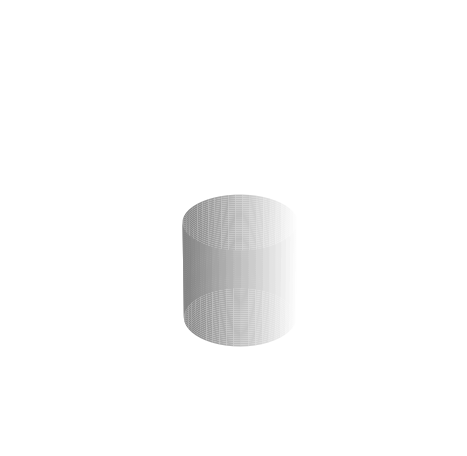

In [118]:
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = linspace(0, height_z, 50)
    theta = linspace(0, 2*pi, 50)
    theta_grid, z_grid = meshgrid(theta, z)
    x_grid = radius*cos(theta_grid) + center_x
    y_grid = radius*sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')
a1.set_facecolor((1.0, 1.0, 1.0, 1.0))
a1._axis3don = False
a1.view_init(elev=30., azim=-45.)

Xc,Yc,Zc = data_for_cylinder_along_z(0,0,1,2)
a1.plot_surface(Xc, -Yc, Zc, alpha=1, color="w")

a1.set_xlim(-2.1, 2.1)
a1.set_ylim(-2.1, 2.1)
a1.set_zlim(-0.1, 4.1);